#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [8]:
model = Sequential()

In [8]:
#卷積層1

In [9]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.add(Dropout(rate=0.25))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
#卷積層2與池化層2

In [12]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [13]:
model.add(Dropout(0.25))

In [15]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [16]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [17]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [18]:
model.add(Dense(10, activation='softmax'))

In [19]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
__________

# 載入之前訓練的模型

In [20]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [23]:
#MSE
model.compile(loss='MSE', optimizer='sgd', metrics=['accuracy'])



In [24]:
train_history = model.fit(x_img_train_normalize,y_label_train_OneHot,validation_split=0.25
                          ,epochs=12,batch_size=128,verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 73s 2ms/step - loss: 0.0907 - acc: 0.1039 - val_loss: 0.0900 - val_acc: 0.1029
Epoch 2/12
37500/37500 [==============================] - 65s 2ms/step - loss: 0.0903 - acc: 0.1023 - val_loss: 0.0899 - val_acc: 0.1047
Epoch 3/12
37500/37500 [==============================] - 65s 2ms/step - loss: 0.0902 - acc: 0.1064 - val_loss: 0.0899 - val_acc: 0.1095
Epoch 4/12
37500/37500 [==============================] - 63s 2ms/step - loss: 0.0901 - acc: 0.1058 - val_loss: 0.0899 - val_acc: 0.1106
Epoch 5/12
37500/37500 [==============================] - 63s 2ms/step - loss: 0.0900 - acc: 0.1121 - val_loss: 0.0898 - val_acc: 0.1152
Epoch 6/12
37500/37500 [==============================] - 68s 2ms/step - loss: 0.0900 - acc: 0.1138 - val_loss: 0.0898 - val_acc: 0.1169
Epoch 7/12
37500/37500 [==============================] - 64s 2ms/step - loss: 0

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

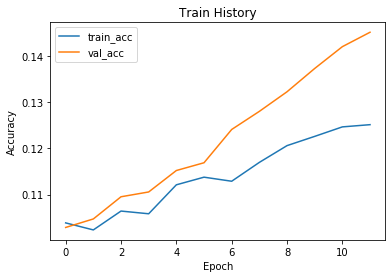

In [26]:
show_train_history('acc','val_acc')

In [33]:
#binary_crossentropy
model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [34]:
train_history = model.fit(x_img_train_normalize,y_label_train_OneHot,validation_split=0.25
                          ,epochs=12,batch_size=128,verbose=1)

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 66s 2ms/step - loss: 0.0952 - acc: 0.9633 - val_loss: 0.1256 - val_acc: 0.9519
Epoch 2/12
37500/37500 [==============================] - 63s 2ms/step - loss: 0.0930 - acc: 0.9644 - val_loss: 0.1233 - val_acc: 0.9528
Epoch 3/12
37500/37500 [==============================] - 63s 2ms/step - loss: 0.0921 - acc: 0.9646 - val_loss: 0.1229 - val_acc: 0.9530
Epoch 4/12
37500/37500 [==============================] - 63s 2ms/step - loss: 0.0920 - acc: 0.9643 - val_loss: 0.1225 - val_acc: 0.9532
Epoch 5/12
37500/37500 [==============================] - 63s 2ms/step - loss: 0.0914 - acc: 0.9644 - val_loss: 0.1216 - val_acc: 0.9537
Epoch 6/12
37500/37500 [==============================] - 63s 2ms/step - loss: 0.0912 - acc: 0.9651 - val_loss: 0.1219 - val_acc: 0.9535
Epoch 7/12
37500/37500 [==============================] - 63s 2ms/step - loss: 0.0906 - acc: 0.9648 - val_loss: 0.1252 - val_acc

In [35]:
import matplotlib.pyplot as plt

def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc','val_acc'],loc='upper left')
    plt.show()

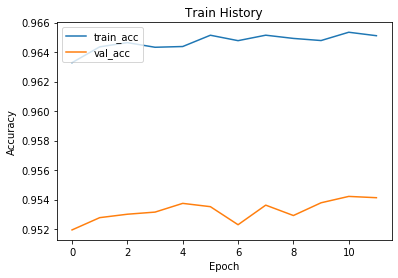

In [36]:
show_train_history('acc','val_acc')